## Credit Sesame Take Home Assessment- Credit Card Default

Import necessary libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import imblearn
import xgboost as xgb
from sklearn.model_selection import train_test_split

Load in data

In [5]:
pd.set_option('display.max_columns', None)

In [9]:
df = pd.read_excel('data.xls', header=1)

In [10]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### EDA

(array([23364.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6636.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

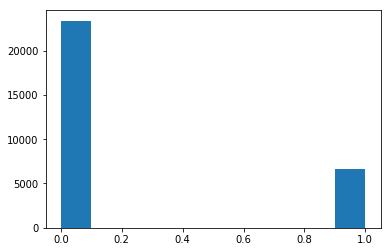

In [12]:
plt.hist(df['default payment next month'])

In [18]:
# imbalanced dataset - only 22% of people defaulted
df.loc[df['default payment next month'] == 1]['default payment next month'].sum() / len(df)

0.2212

In [29]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

### Prepare and Clean Data for Modeling

In [ ]:
# feature engineering

In [24]:
X = df.drop(['default payment next month'], axis=1)
y = df['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
SMOTE

### Baseine Model- GBT

This model was the first to pop into my head because GBTs are great with tabular data and have shown excellent results for Kaggle competition winners.

In [35]:
dtrain = xgb.DMatrix(df, label=df['default payment next month'])
# dtest

/Users/hannahlyon/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hannahlyon/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [ ]:
param = {'max_depth': 5, 'eta': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}

### Metrics

### Second Model- feature engineering, SMOTE, and _______

### Findings